In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
import yfinance as yf

In [2]:
tickers = ['V', 'ADBE', 'CI']

data = pd.DataFrame()
for t in tickers:
    tick = yf.Ticker(t)
    data[t] = tick.history(period='5y')['Close']


In [3]:
log_returns = np.log(1+data.pct_change())

port_returns = []
port_vols = []

for i in range(10000):
    num_assets = len(tickers)
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    port_returns.append(np.sum(weights*log_returns.mean())*252)
    port_vols.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights))))

port_returns = np.array(port_returns)
port_vols = np.array(port_vols)

In [4]:
def portfolio_stats(weights, log_returns):
    
    port_returns = (np.sum(weights*log_returns.mean())*252)
    port_vols = (np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*252,weights))))
    sharpe_ratio = (port_returns)/port_vols
    return {'Return': port_returns, 'Volatility': port_vols, 'Sharpe': sharpe_ratio}


In [5]:

sharpe_ratio = (port_returns)/port_vols
max_sr_returns = port_returns[sharpe_ratio.argmax()]
max_sr_volatility = port_vols[sharpe_ratio.argmax()]

In [6]:

def minimize_sharpe(weights, log_returns):
    return -portfolio_stats(weights, log_returns)['Sharpe']


In [7]:

initializer = num_assets * [1./num_assets,]
bounds = tuple((0,1)for x in range(num_assets))


In [8]:

optimal_sharpe = optimize.minimize(minimize_sharpe, initializer, method = 'SLSQP', args=(log_returns,), bounds=bounds)
optimal_sharpe_weights = optimal_sharpe['x'].round(3)
optimal_stats = portfolio_stats(optimal_sharpe_weights, log_returns)


In [9]:

print("Portfolio's optimal weights: ", list(zip(tickers, list(optimal_sharpe_weights*100))))
print("Portfolio's optimal return: ", np.round(optimal_stats['Return']*100,3))
print("Portfolio's optimal voltatility: ", np.round(optimal_stats['Volatility']*100,3))
print("Portfolio's optimal sharpe ratio: ", np.round(optimal_stats['Sharpe'],3))


Portfolio's optimal weights:  [('V', 42.3), ('ADBE', 51.6), ('CI', 0.0)]
Portfolio's optimal return:  16.23
Portfolio's optimal voltatility:  28.327
Portfolio's optimal sharpe ratio:  0.573


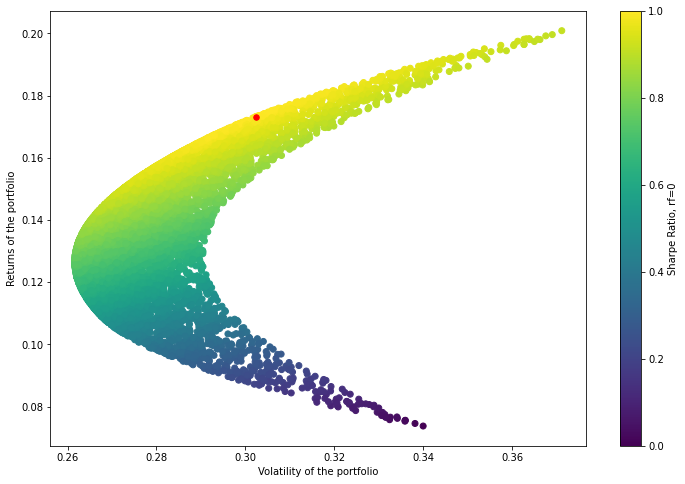

In [10]:

plt.figure(figsize=(12,8))
plt.scatter(port_vols,port_returns , c=(port_returns/port_vols))
plt.scatter(max_sr_volatility, max_sr_returns, c='red', s=30)
plt.colorbar(label='Sharpe Ratio, rf=0')
plt.xlabel('Volatility of the portfolio')
plt.ylabel('Returns of the portfolio')
plt.show()